<a href="https://colab.research.google.com/github/SewoongPark/SeSac_study_repo/blob/main/study_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TIL**

### **전이 학습(Transfer Learning)**
* 전이 학습은 다양한 사전 훈련된 모델이 있는 작업에 유용합니다. 예를 들어, 널리 사용되는 많은 CNN(컨벌루션 신경망)은 1,400만 개 이상의 영상과 수천 개의 영상 클래스를 포함하는 ImageNet 데이터셋에 대해 사전 훈련되었습니다. <br>만약 여러분이 정원의 꽃 영상(또는 ImageNet 데이터셋에 포함되지 않은 영상)을 분류해야 하는데 꽃 영상 수가 제한적인 경우, SqueezeNet 신경망에서 계층과 가중치를 전이하고 최종 계층을 교체한 후 보유한 영상으로 모델을 재훈련시킬 수 있습니다.<br>
이 접근법으로 여러분은 전이 학습을 통해 더 짧은 시간에 더 높은 모델 정확도를 달성할 수 있습니다.
<img src = "https://kr.mathworks.com/discovery/transfer-learning/_jcr_content/mainParsys/band/mainParsys/lockedsubnav/mainParsys/columns_1336656927/a8810b41-e0c1-4c16-91f9-10b6a66488fe/image_copy_1488534355.adapt.full.medium.gif/1705253487834.gif" style="width: 50%;">

* **모델 종류: Resnet 50**
> * ResNet-50은 딥러닝에서 널리 사용되는 컨볼루션 신경망 중 하나로, Microsoft Research에서 개발되었습니다. "ResNet"은 "Residual Network"의 줄임말로, 네트워크의 깊이를 키우는 동안 그라디언트 소실 문제를 해결하기 위한 특별한 구조를 가지고 있습니다
<img src = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/resnet_architecture.png">

* 우수 활용 사례: tensorflow Airbnb
  * 방 유형을 분류해서 사진을 업로드해야하는 상황(주방이냐, 거실이냐 등)
  * 데이터 라벨링을 위해 하이브리드(사람 검수 + 자동화)방법 도입
  * 사람들이 인터넷에 업로드한 사진과 설명을 사용하여 라벨링에 이용
  > * 주방 사진만 가져오기 위해서 SQL로 필터링
  
    ``` SQL
    WHERE LOWER(caption) NOT LIKE "%livingroom%"
    WHERE LOWER(caption) NOT LIKE "%bed%"
    WHERE LOWER(caption) NOT LIKE "%bath%"
    ```

* #### ResNet-50 모델의 특징
* **깊이:**<br>
 > ResNet-50은 50개의 레이어로 구성됩니다. 이는 이전의 네트워크 아키텍처인 VGG나 AlexNet보다 더 깊은 네트워크입니다.
* **Residual connections:** <br>
> ResNet의 핵심 아이디어는 잔차 학습(Residual Learning)입니다. 각 블록에서 입력이 출력에 직접 추가되는 잔차 연결(residual connection)이 있습니다. 이를 통해 네트워크가 더 쉽게 학습하고 최적화할 수 있습니다.
* **Bottleneck 구조:** <br>
  > ResNet-50은 "bottleneck" 구조를 사용합니다. 이는 1x1, 3x3, 1x1 컨볼루션 레이어로 구성된 블록으로, 연산량을 줄이고 효율적으로 학습을 진행할 수 있도록 도와줍니다.

* **Pre-trained 모델:** <br>
> ResNet-50은 대규모 이미지 데이터셋(ImageNet)에 대해 사전 훈련된 가중치를 가진 모델로 제공됩니다. 이를 통해 전이 학습(transfer learning)을 사용하여 다양한 컴퓨터 비전 작업에 쉽게 적용할 수 있습니다.

* **AlexNet**

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbxzopl%2FbtqO7hUvidV%2FSTksKg4JDu6O34PpbVFxl1%2Fimg.png" style = "width:70%">

* ConV층에서 Pooling은 지난 강의에서 보통 max Pooling으로 receptive field에서 지정한 구간내의 max값을 취한다고 했었죠? 그러므로 맥스풀링에서는 파라미터가 없습니다.
* 그렇게 ConV layer를 거치면 이 feature map들을 flatten해주므로 4096개 뉴런이 있는 FC layer로 진입합니다.
* FC층에서 FC6,7 layer에서는 가장 흔히 쓰는 Relu함수를 비선형 함수로 이용합니다
* 그리고 출력층 FC8에서는 1000개의 class score를 뱉기 위한 softmax함수를 이용합니다.
* 2개의 Normalization층은 실험 결과, 크게 효과가 없다고 밝혀져서 현재는 잘 사용하지 않지만 AlexNet에서는 쓰였습니다.


## **CNN**

* Convolution Neural Network란?
> * Convolutional neural network(CNN 또는 ConvNet)란 데이터로부터 직접 학습하는 딥러닝의 신경망 아키텍처입니다.
> * CNN은 영상에서 객체, 클래스, 범주 인식을 위한 패턴을 찾을 때 특히 유용합니다. 또한, 오디오, 시계열 및 신호 데이터를 분류하는 데도 매우 효과적입니다.

* #### 특징 학습, 계층 및 분류
* CNN은 입력 계층, 출력 계층, 그리고 그 사이의 은닉 계층으로 구성됩니다.
<img src = "https://kr.mathworks.com/discovery/convolutional-neural-network/_jcr_content/mainParsys/band_copy_copy/mainParsys/lockedsubnav/mainParsys/columns/a32c7d5d-8012-4de1-bc76-8bd092f97db8/image_792810770_copy.adapt.full.medium.jpg/1704399443460.jpg" style = "width: 70%">

> * **컨볼루션 계층**은 입력 영상을 일련의 컨볼루션 필터에 통과시킵니다. <br>각 **필터는 영상에서 feature를** 활성화합니다.<br>행과 열에 대해서 Inner product연산을 수행하기 때문에 Convolution 2D라고 칭합니다. -> feature map을 추출합니다.
  * 필터(kernel) 곧 weight이고, 필터는 많으면 많을수록 좋다.
  * 연산 중 channel의 수는 bias의 수와 동일하다.

> * **ReLU(Rectified Linear Unit) 계층**은 음수 값은 0에 매핑하고 양수 값은 그대로 두어서 더 빠르고 효과적인 훈련이 이루어지도록 합니다. <br>이때 활성화된 특징만 다음 계층으로 전달되므로 이를 활성화라고도 합니다.

> * **풀링 계층**은 비선형 다운샘플링(down-sampling)을 수행하여 신경망이 학습해야 하는 파라미터의 개수를 줄임으로써 출력을 단순화합니다.<br>
  * Max Pooling은 각 영역에서 가장 큰 값을 선택하여 해당 영역을 대표하는 값을 출력합니다. 일반적으로 2x2 윈도우 크기와 2x2 스트라이드(stride)를 사용합니다. 이는 특징 맵의 크기를 절반으로 줄입니다.
  * 예를 들어, 2x2 Max Pooling은 2x2 영역에서 가장 큰 값을 선택하여 2x2 픽셀 영역을 1개의 픽셀로 대체합니다.
  이러한 연산이 수십 또는 수백 개의 계층에 대해 반복되며, 각 계층은 서로 다른 특징을 식별하도록 학습합니다.
  > * **Max Pooling에서 데이터 손실은 없는가?**
    * Max Pooling에서는 각 영역에서 가장 큰 값을 선택하고, 선택된 값만 사용하여 특징 맵을 다운샘플링합니다. 이러한 과정에서 선택되지 않은 값들은 버려지게 됩니다. 따라서 Max Pooling은 데이터의 일부 손실을 유발합니다.
    * 그러나 이 손실이 항상 부정적인 영향을 미치는 것은 아닙니다. Max Pooling은 불필요한 세부 정보를 제거하고 중요한 특징을 강조하는 역할을 하며, 과적합을 방지하고 모델의 일반화 성능을 향상시킬 수 있습니다. 또한, 최종적으로는 손실된 세부 정보가 네트워크의 다른 레이어에서 보정될 수 있습니다.<br>
  따라서 Max Pooling은 데이터 손실을 유발하지만, 이는 모델의 학습과 일반화에 긍정적인 영향을 미칠 수 있습니다.

    * 컴퓨터의 성능이 좋아지고 있으므로, 이미지의 크기를 줄이는 과정은 사라지는 추세임.
  
  

> * **Fully Connected 레이어:**
  * Fully Connected 레이어는 모든 입력 뉴런과 출력 뉴런이 서로 연결된 레이어입니다. 이는 각 입력과 출력 사이의 모든 가능한 연결을 가집니다.
  * Fully Connected 레이어는 주로 분류(classification)나 회귀(regression)와 같은 작업을 위해 사용됩니다. 주로 출력 레이어로 사용되며, 입력 데이터를 평탄화(flatten)한 후에 사용됩니다.
  * 예를 들어, 입력 이미지의 특징을 추출한 후에 Fully Connected 레이어를 사용하여 이미지에 대한 분류를 수행할 수 있습니다. 이때, Fully Connected 레이어의 출력은 각 클래스에 대한 확률 값을 나타냅니다.
  * Fully Connected 레이어의 출력은 보통 클래스 수와 같은 크기를 가지며, 각 클래스에 대한 점수를 나타냅니다. 이 점수는 일반적으로 활성화 함수를 통해 클래스에 속할 확률로 변환됩니다. Softmax 함수는 이 점수를 확률로 변환하여 각 클래스에 속할 확률을 계산합니다.

<img src = "https://kr.mathworks.com/discovery/convolutional-neural-network/_jcr_content/mainParsys/band_copy_copy/mainParsys/lockedsubnav/mainParsys/columns/a32c7d5d-8012-4de1-bc76-8bd092f97db8/image_2109075398_cop.adapt.full.medium.jpg/1704399443473.jpg" style = "width: 70%">

> 여러 컨볼루션 계층이 있는 신경망의 예. 각 훈련 영상에 서로 다른 해상도의 필터가 적용되고, 컨볼루션된 각 영상은 다음 계층의 입력으로 사용됩니다.

## **CNN 작동원리**
<img src = "https://velog.velcdn.com/images/nayeon_p00/post/e6e205e9-4bd7-4789-bf58-8c1b42fde7bd/image.png">

> 위 input image에서 순서대로 필터와 같은 크기 부분과 필터의 inner product 연산을 해주면 아래 빨간색 테두리 처럼 해당위치의 결과값은 4가 나옵니다. 이과정을 순서대로 위치를 옮겨가며 진행하게 됩니다.

<img src = "https://velog.velcdn.com/images/nayeon_p00/post/218f9c49-9030-4e02-9cb3-160766b82ef3/image.png">

> 3 * 3 결과 행렬에는 필터의 값과 이미지 행렬의 값을 곱하고 총합해준 값들이 저장됩니다.  


### **CNN 레이어 검증**

**1. 텐서플로우 데이터셋의 흑백 28 * 28 손글씨 자료 50개를 갖고와서 CNN에 넣기 위하여 (28 * 28 * 1)로 변경:**

In [63]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))[:50]
test_images = test_images.reshape((10000, 28, 28, 1))[:50]
train_labels = train_labels[:50]
test_labels = test_labels[:50]

**2. 학습의편의성을위하여50개이미지를높이, 너비를10,10 으로변경**

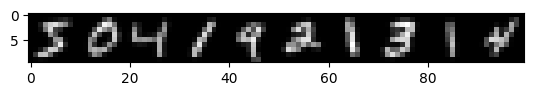

In [64]:
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

train_images = resize(train_images, (50, 10, 10, 1))
test_images = resize(test_images, (50, 10, 10, 1))
np.shape(train_images)
plt.imshow(np.hstack(train_images[:10]), cmap = "gray")

**3. 계산 검증의 편의성을 위하여 float를 int로 변경**

In [65]:
import pandas as pd

pd.DataFrame(np.vstack(train_images[0]).reshape(10, 10))

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000e+00,0.000000e+00,3.779813e-09,5.703982e-07,0.000004,1.042152e-05,0.000015,8.009369e-06,1.619335e-08
1,0.000000,3.493966e-07,7.807178e-04,7.999273e-03,2.619184e-02,0.059819,1.155171e-01,0.155306,7.679844e-02,1.519801e-04
2,0.000000,9.857660e-05,1.036307e-01,5.545328e-01,7.500384e-01,0.815209,6.413300e-01,0.491694,1.539254e-01,2.481732e-04
3,0.000000,2.617595e-05,5.656854e-02,4.300613e-01,8.046835e-01,0.233121,1.624373e-01,0.008346,1.218553e-03,5.837837e-07
4,0.000000,9.748591e-09,1.279662e-04,2.502775e-02,5.374982e-01,0.290856,3.380014e-02,0.000305,1.190274e-08,0.000000e+00
5,0.000000,0.000000e+00,6.266862e-09,2.610279e-04,6.696573e-02,0.564458,5.666593e-01,0.047100,1.411354e-05,0.000000e+00
6,0.000000,4.497760e-08,3.063738e-05,3.220381e-03,7.633813e-02,0.401042,8.656932e-01,0.157746,1.073702e-04,0.000000e+00
7,0.000008,5.200728e-03,7.889449e-02,3.434775e-01,7.748787e-01,0.739755,3.174749e-01,0.021589,2.289392e-06,0.000000e+00
8,0.000387,2.102920e-01,6.982965e-01,7.215174e-01,3.777502e-01,0.048582,1.853358e-03,0.000010,1.813034e-10,0.000000e+00
9,0.000029,1.430609e-02,3.384249e-02,1.997844e-02,1.852532e-03,0.000012,1.298005e-08,0.000000,0.000000e+00,0.000000e+00


In [66]:
train_images = (train_images * 10).astype('int32')
test_images = (test_images * 10).astype('int32')
pd.DataFrame(np.vstack(train_images[0]).reshape(10, 10))

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0
2,0,0,1,5,7,8,6,4,1,0
3,0,0,0,4,8,2,1,0,0,0
4,0,0,0,0,5,2,0,0,0,0
5,0,0,0,0,0,5,5,0,0,0
6,0,0,0,0,0,4,8,1,0,0
7,0,0,0,3,7,7,3,0,0,0
8,0,2,6,7,3,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


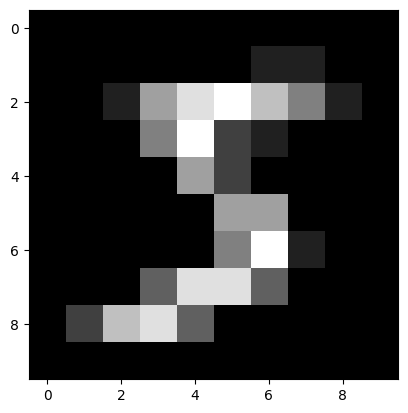

In [67]:
plt.imshow(train_images[0], cmap = "gray")

**4. CNN 모델 제작**

In [68]:
import tensorflow as tf
tf.random.set_seed(123)
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation = "relu", input_shape = (10, 10, 1))) # output: (10 - 3) + 1 = (8 * 8) (이미지 크기:10, 커널 크기: 3, 채널 1)
model.add(layers.MaxPooling2D((2, 2))) # output: (4 * 4), 채널 1
model.add(layers.Conv2D(2, (3, 3), activation = "relu")) # output: (4 - 3) + 1 = (2 * 2 * 3)

model.add(layers.Flatten()) # output: (2 * 2 * 3) = (12, )
model.add(layers.Dense(2, activation = "relu")) # output: {(12 + 1) + (12 + 1)} * 2 = (26, )
model.add(layers.Dense(10, activation = "softmax")) # output: 26 params


In [82]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

get_output

[<KerasTensor: shape=(None, 8, 8, 1) dtype=float32 (created by layer 'conv2d_6')>,
 <KerasTensor: shape=(None, 4, 4, 1) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 2, 2, 2) dtype=float32 (created by layer 'conv2d_7')>,
 <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'flatten_3')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_6')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_7')>]

**5. 모델w값setting**

In [83]:
# 첫번째 레이어만 조회
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[0])
visual_model.summary()
test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer  [(None, 10, 10, 1)]       0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 1)           10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 44ms/step


In [84]:
len(visual_model.get_weights()),\
visual_model.get_weights()[0],\
visual_model.get_weights()[1]

(2,
 array([[[[-0.4318703 ]],
 
         [[ 0.08380783]],
 
         [[-0.23193197]]],
 
 
        [[[ 0.05313462]],
 
         [[ 0.25442973]],
 
         [[ 0.33345792]]],
 
 
        [[[-0.22227043]],
 
         [[-0.02131751]],
 
         [[ 0.17737235]]]], dtype=float32),
 array([-0.00019932], dtype=float32))

In [89]:
setW = np.array([[-0.4318703, 0.08380783, -0.23193197],
 [0.05313462, 0.25442973, 0.33345792],
  [-0.22227043, -0.02131751, 0.17737235]])
setB = np.array([-0.00019932])

setW = setW.reshape(3,3,1,1)
weights = setW, setB
visual_model.set_weights(weights)

In [90]:
w = visual_model.get_weights()[0]
b = visual_model.get_weights()[1]

np.shape(w), np.vstack(w).reshape(3, 3), b

((3, 3, 1, 1),
 array([[-0.4318703 ,  0.08380783, -0.23193197],
        [ 0.05313462,  0.25442973,  0.33345792],
        [-0.22227043, -0.02131751,  0.17737235]], dtype=float32),
 array([-0.00019932], dtype=float32))

In [87]:
wVal = np.vstack(w).reshape(3, 3) # kernel화
img = np.vstack(train_images[0]).reshape(10, 10)
img[:3,:3]*wVal, np.sum(img[:3,:3]*wVal)+b

(array([[-0.        ,  0.        , -0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.        , -0.        ,  0.17737235]]),
 array([0.17717303], dtype=float32))

In [92]:
wVal, b

(array([[-0.4318703 ,  0.08380783, -0.23193197],
        [ 0.05313462,  0.25442973,  0.33345792],
        [-0.22227043, -0.02131751,  0.17737235]], dtype=float32),
 array([-0.00019932], dtype=float32))

**6. 모델 결과 계산(feature_maps 계산)**

In [98]:
wVal = np.vstack(w).reshape(3, 3)
img = np.vstack(train_images[0]).reshape(10, 10)
print("▶---0:3, 0:3에서 stride 1한 높이 0:3, 너비 1:4 인덱싱 값")
print(img[0:3, 1:4])

print("\n▶---img[0:3, 1:4] * w")
print(img[0:3, 1:4] * wVal )

print("\n▶---img[0:3, 1:4] * w의 합 + bias")
np.sum(img[0:3, 1:4]*wVal) + b


▶---0:3, 0:3에서 stride 1한 높이 0:3, 너비 1:4 인덱싱 값
[[0 0 0]
 [0 0 0]
 [0 1 5]]

▶---img[0:3, 1:4] * w
[[-0.          0.         -0.        ]
 [ 0.          0.          0.        ]
 [-0.         -0.02131751  0.88686176]]

▶---img[0:3, 1:4] * w의 합 + bias


array([0.86534494], dtype=float32)

In [23]:
wVal

array([[-0.4318703 ,  0.08380783, -0.23193197],
       [ 0.05313462,  0.25442973,  0.33345792],
       [-0.22227043, -0.02131751,  0.17737235]], dtype=float32)

**7. 모델 최종값 계산- Relu 함수에 의해서– 값은 0으로 변경됨**

,0,1,2,3,4,5,6,7
0,0.354545,0.311910,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1.021461,1.665058,1.326756,0.807420,0.487117,0.000000,0.000000,0.0
2,0.202853,1.212786,1.608592,2.086778,3.845237,3.359437,0.004899,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,1.220120,1.343475,0.380702,0.000000,0.0
5,0.000000,0.000000,0.531918,2.258068,0.000000,0.000000,0.000000,0.0
6,0.000000,0.177173,2.397836,1.055281,0.000000,0.000000,0.000000,0.0
7,0.000000,0.510631,3.091642,1.184737,0.000000,0.000000,0.000000,0.0


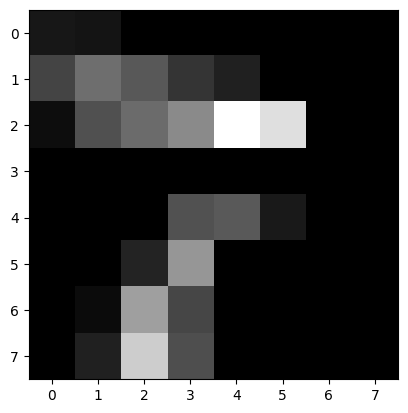

In [99]:
## 최종출력
len(feature_maps[0][0])
plt.imshow(feature_maps[0], cmap = "gray")
pd.DataFrame(np.vstack(feature_maps[0]).reshape(8,8))

**8. Pooling 값 확인: max pooling(2,2)는 2*2의 4개의 자료중 가장 큰값을 꺼내는 값임 (stride는 pool값 2)**

In [106]:
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[2])
visual_model.summary()
test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer  [(None, 10, 10, 1)]       0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 1)           0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [=================

In [142]:
feature_maps[0].shape

(8,)

In [146]:
# plt.imshow(feature_maps[0], cmap = "gray")
plt.show()
pd.DataFrame(np.vstack(feature_maps[0]).reshape(-1,4))

,0,1,2,3
0,0.0,0.0,0.208120,0.0
1,0.0,0.0,0.189346,0.0


**Layer2번층 : 풀링층을 거친 자료를 다시 Conv2d할때**

In [105]:
len(visual_model.get_weights())

2

In [108]:
print(len(visual_model.get_weights()))
w = visual_model.get_weights()[0]
b = visual_model.get_weights()[1]
print(np.vstack(w).reshape(3,3),b)
print(np.shape(w), np.shape(b))
print("-"*100)
w = visual_model.get_weights()[2]
b = visual_model.get_weights()[3]
print(w, b)

4
[[-0.4318703   0.08380783 -0.23193197]
 [ 0.05313462  0.25442973  0.33345792]
 [-0.22227043 -0.02131751  0.17737235]] [-0.00019932]
(3, 3, 1, 1) (1,)
----------------------------------------------------------------------------------------------------
[[[[-0.04126796 -0.18519753]]

  [[ 0.19076315  0.11734369]]

  [[-0.3964265   0.37356785]]]


 [[[ 0.02255318 -0.3923856 ]]

  [[ 0.17294326 -0.35652357]]

  [[-0.19924152  0.13951269]]]


 [[[-0.23915954 -0.10738635]]

  [[-0.00082463 -0.33100393]]

  [[-0.06199858  0.1437839 ]]]] [0. 0.]


In [109]:
setW = np.array([[-0.4318703, 0.08380783, -0.23193197],
 [0.05313462, 0.25442973, 0.33345792],
  [-0.22227043, -0.02131751, 0.17737235]])
setB = np.array([-0.00019932])

w2 = visual_model.get_weights()[2]
b2 = visual_model.get_weights()[3]

setW = setW.reshape(3,3,1,1)
weights = [setW, setB, w2, b2]

visual_model.set_weights(weights)

In [113]:
len(visual_model.get_weights())
w = visual_model.get_weights()[2]
w, b

(array([[[[-0.04126796, -0.18519753]],
 
         [[ 0.19076315,  0.11734369]],
 
         [[-0.3964265 ,  0.37356785]]],
 
 
        [[[ 0.02255318, -0.3923856 ]],
 
         [[ 0.17294326, -0.35652357]],
 
         [[-0.19924152,  0.13951269]]],
 
 
        [[[-0.23915954, -0.10738635]],
 
         [[-0.00082463, -0.33100393]],
 
         [[-0.06199858,  0.1437839 ]]]], dtype=float32),
 array([0., 0.], dtype=float32))

In [120]:
maxpoolResult = np.array(
[[2.6310093, 4.992998, 2.6713052, 1.0994523],
 [0.2577803, 2.93569, 0., 0.],
  [0.53191775, 2.331755, 2.2812119, 0.0529353],
  [3.2710578, 2.146567, 0.9660892, 0.]])

In [115]:
visual_model.get_weights()

[array([[[[-0.4318703 ]],
 
         [[ 0.08380783]],
 
         [[-0.23193197]]],
 
 
        [[[ 0.05313462]],
 
         [[ 0.25442973]],
 
         [[ 0.33345792]]],
 
 
        [[[-0.22227043]],
 
         [[-0.02131751]],
 
         [[ 0.17737235]]]], dtype=float32),
 array([-0.00019932], dtype=float32),
 array([[[[-0.04126796, -0.18519753]],
 
         [[ 0.19076315,  0.11734369]],
 
         [[-0.3964265 ,  0.37356785]]],
 
 
        [[[ 0.02255318, -0.3923856 ]],
 
         [[ 0.17294326, -0.35652357]],
 
         [[-0.19924152,  0.13951269]]],
 
 
        [[[-0.23915954, -0.10738635]],
 
         [[-0.00082463, -0.33100393]],
 
         [[-0.06199858,  0.1437839 ]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [127]:
f1 = w[:,:,:,0]
f2 = w[:,:,:,1]

print("MaxpoolResult 값")
print(maxpoolResult[:3, :3])
print("\nfeature1 값", "-"*100)
print(f1.reshape(3,3))
print("\nfeature2 값", "-"*100)
print(f2.reshape(3,3))

print("\n [:3,:3]*feature1값 + b[0]합", "-"*50)
np.sum(maxpoolResult[:3,:3] * f1.reshape(3,3)+b[0]),\
np.sum(maxpoolResult[:3,:3] * f2.reshape(3,3)+b[0])


MaxpoolResult 값
[[2.6310093  4.992998   2.6713052 ]
 [0.2577803  2.93569    0.        ]
 [0.53191775 2.331755   2.2812119 ]]

feature1 값 ----------------------------------------------------------------------------------------------------
[[-0.04126796  0.19076315 -0.3964265 ]
 [ 0.02255318  0.17294326 -0.19924152]
 [-0.23915954 -0.00082463 -0.06199858]]

feature2 값 ----------------------------------------------------------------------------------------------------
[[-0.18519753  0.11734369  0.37356785]
 [-0.3923856  -0.35652357  0.13951269]
 [-0.10738635 -0.33100393  0.1437839 ]]

 [:3,:3]*feature1값 + b[0]합 --------------------------------------------------


(0.027881093933937645, -0.5521770761597604)

In [134]:
f1.reshape(3,3)

array([[-0.04126796,  0.19076315, -0.3964265 ],
       [ 0.02255318,  0.17294326, -0.19924152],
       [-0.23915954, -0.00082463, -0.06199858]], dtype=float32)

In [128]:
feature_maps

array([[[[0.        , 0.        ],
         [0.20812039, 0.        ]],

        [[0.        , 0.        ],
         [0.18934602, 0.        ]]]], dtype=float32)

**8.flatten()**

In [129]:
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[3])
visual_model.summary()
test_img = np.expand_dims(test_images[0], axis = 0)
feature_maps = visual_model.predict(test_img)

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer  [(None, 10, 10, 1)]       0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 1)           0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
 flatten_3 (Flatten)         (None, 8)                 0         
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.0

In [131]:
len(visual_model.get_weights())

4

In [132]:
feature_maps

array([[0.        , 0.        , 0.20812039, 0.        , 0.        ,
        0.        , 0.18934602, 0.        ]], dtype=float32)